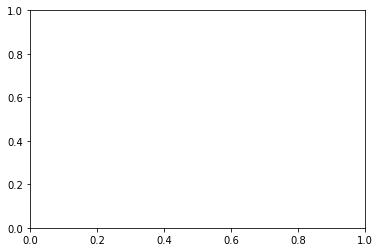

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import multinetx as mx
from py3plex.core import multinet



In [3]:
df = pd.read_csv("covid-college-data.csv")

In [4]:
df.head()

,stid,crsid,field6,gradstudent
0,1,3533,business law,1
1,1,3532,business law,1
2,1,3525,business law,1
3,1,3520,business law,1
4,1,3515,business law,1


In [5]:
graph = nx.Graph()

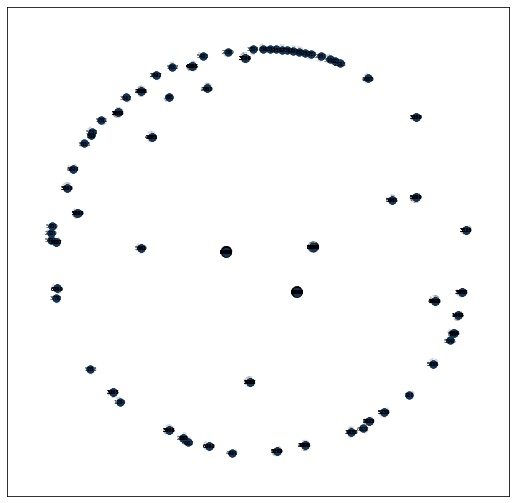

In [6]:
G = nx.from_pandas_edgelist(df, 'stid', 'crsid', True, nx.DiGraph())
pos = nx.kamada_kawai_layout(G)
nodes = G.nodes()
fig, axs = plt.subplots(1, 1, figsize=(9,9))
el = nx.draw_networkx_edges(G, pos, alpha=0.1, ax=axs)
nl = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='#123456', node_size=50, ax=axs)
ll = nx.draw_networkx_labels(G, pos, font_size=5, font_family='sans-serif')

In [7]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 516
Number of edges: 499
Average in degree:   0.9671
Average out degree:   0.9671


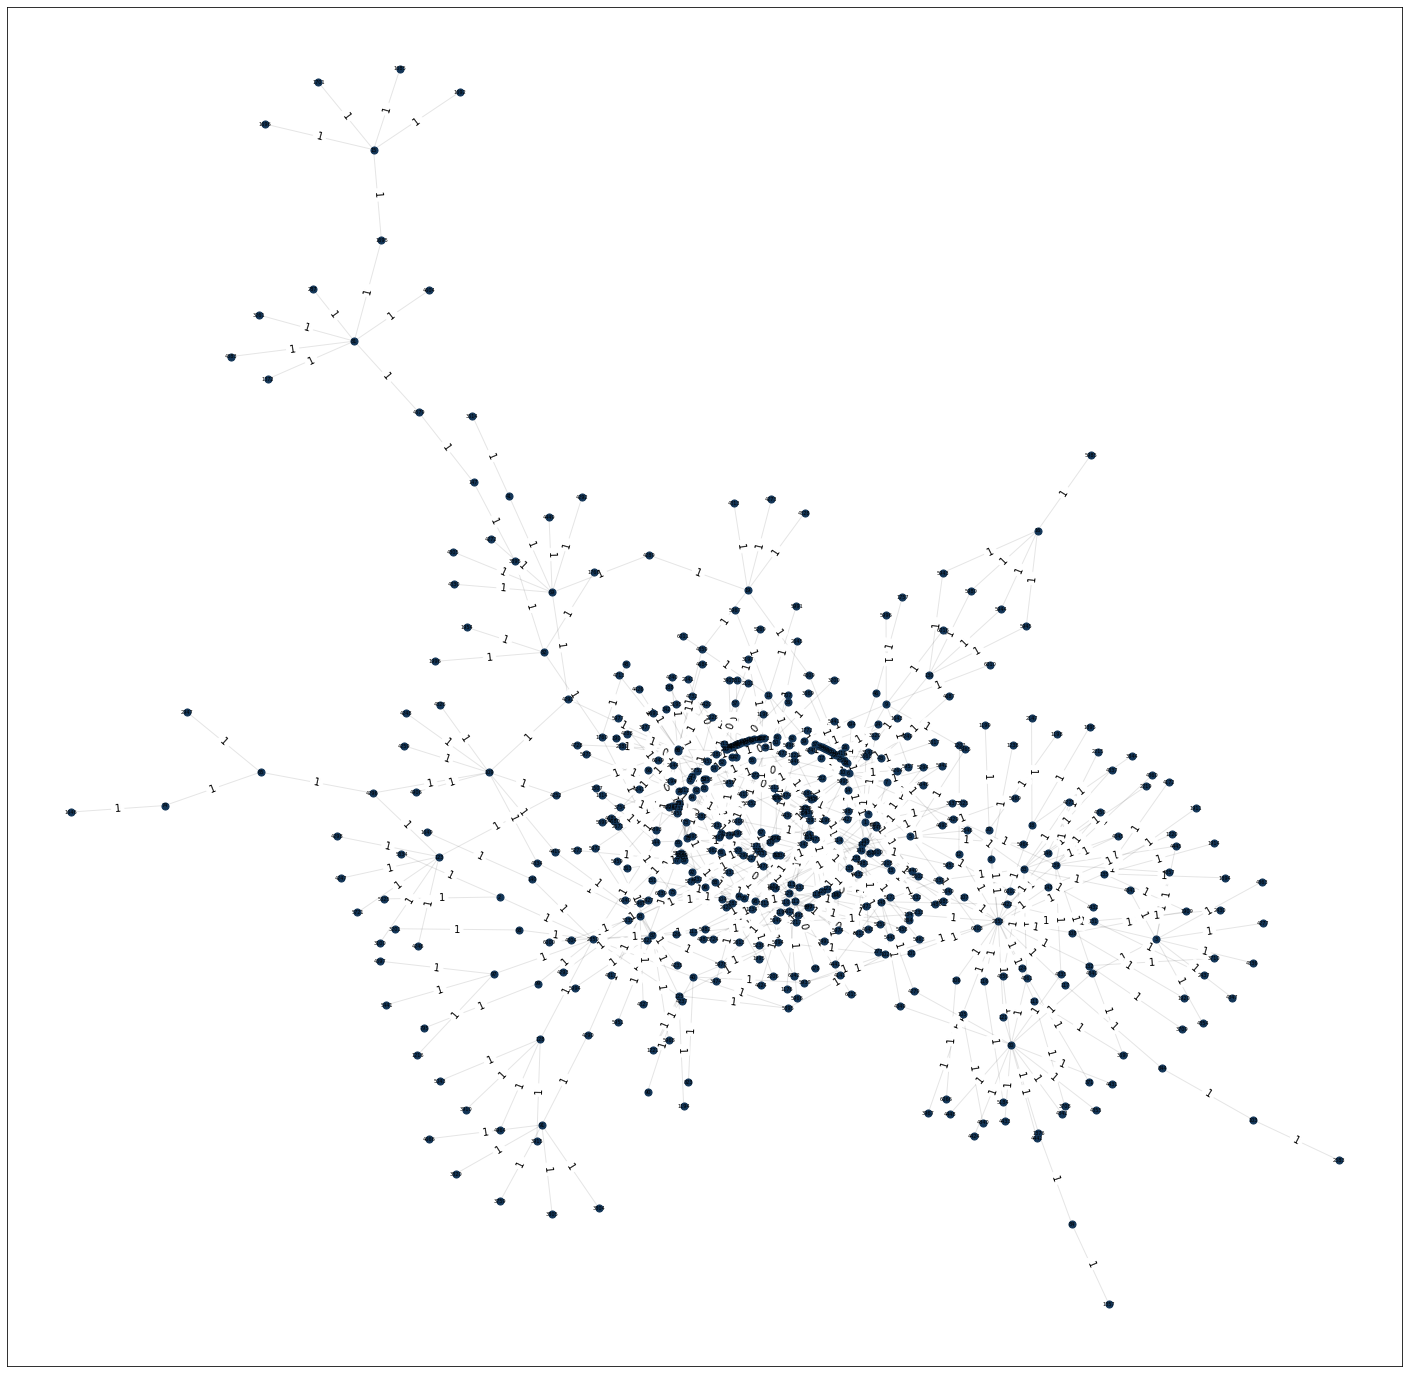

In [8]:
edge_label = {x: G.edges[x]['gradstudent'] for x in G.edges}
covid_network = nx.from_pandas_edgelist(df,"stid","crsid","gradstudent")
pos = nx.kamada_kawai_layout(covid_network)
nodes = covid_network.nodes()
fig, axs = plt.subplots(1, 1, figsize=(25,25))
el = nx.draw_networkx_edges(covid_network, pos, alpha=0.1, ax=axs)
nl = nx.draw_networkx_nodes(covid_network, pos, nodelist=nodes, node_color='#123456', node_size=50, ax=axs)
ll = nx.draw_networkx_labels(covid_network, pos, font_size=5, font_family='sans-serif')
kl = nx.draw_networkx_edge_labels(covid_network,pos,edge_labels=edge_label)


In [9]:
nx.is_connected(covid_network)

False

<b>Detecting communities

In [10]:
subgraphs = [covid_network.subgraph(c) for c in nx.connected_components(covid_network)]
subgraph_nodes = [sg.number_of_nodes() for sg in subgraphs]
df_subgraphs = pd.DataFrame(data={
  'id': range(len(subgraph_nodes)),
  'nodes': subgraph_nodes})
df_subgraphs['percentage'] = df_subgraphs['nodes'].map(lambda x: 100*x/sum(df_subgraphs['nodes']))
df_subgraphs = df_subgraphs.sort_values('nodes', ascending=False).reset_index(drop=True)
df_subgraphs

,id,nodes,percentage
0,1,117,22.674419
1,2,109,21.124031
2,4,40,7.751938
3,28,10,1.937984
4,59,9,1.744186
...,...,...,...
66,37,2,0.387597
67,39,2,0.387597
68,8,2,0.387597
69,16,2,0.387597


In [11]:
import networkx.algorithms.community as nx_comm
nx_comm.modularity(covid_network, nx_comm.label_propagation_communities(covid_network))


0.7742117501536135

Two big communities with 22.6% and 21.1%. How these are connected? will find later using shortest paths.

Getting Some positions of actors in network , which plays great role in transmitting.<br>
<b>Betweenness Centrality</b><br>
A node with high betweenness centrality serves as a common gateway between nodes.Betweenness centralization quantifies the extent to which particular nodes are more central than other nodes in the network.

In [27]:
bet_cent = nx.betweenness_centrality(covid_network)
# turn dictionary into dataframe

df_bet_cent = pd.DataFrame.from_dict(bet_cent, orient='index', columns=['betweenness centrality']).sort_index()

df_bet_cent.head()

,betweenness centrality
1,0.000076
2,0.001730
3,0.004459
4,0.000034
5,0.001313


In [28]:
df_bet_cent.nlargest(5, ['betweenness centrality']) 

,betweenness centrality
2853,0.034711
6,0.019701
2850,0.017887
144,0.017594
61,0.015160


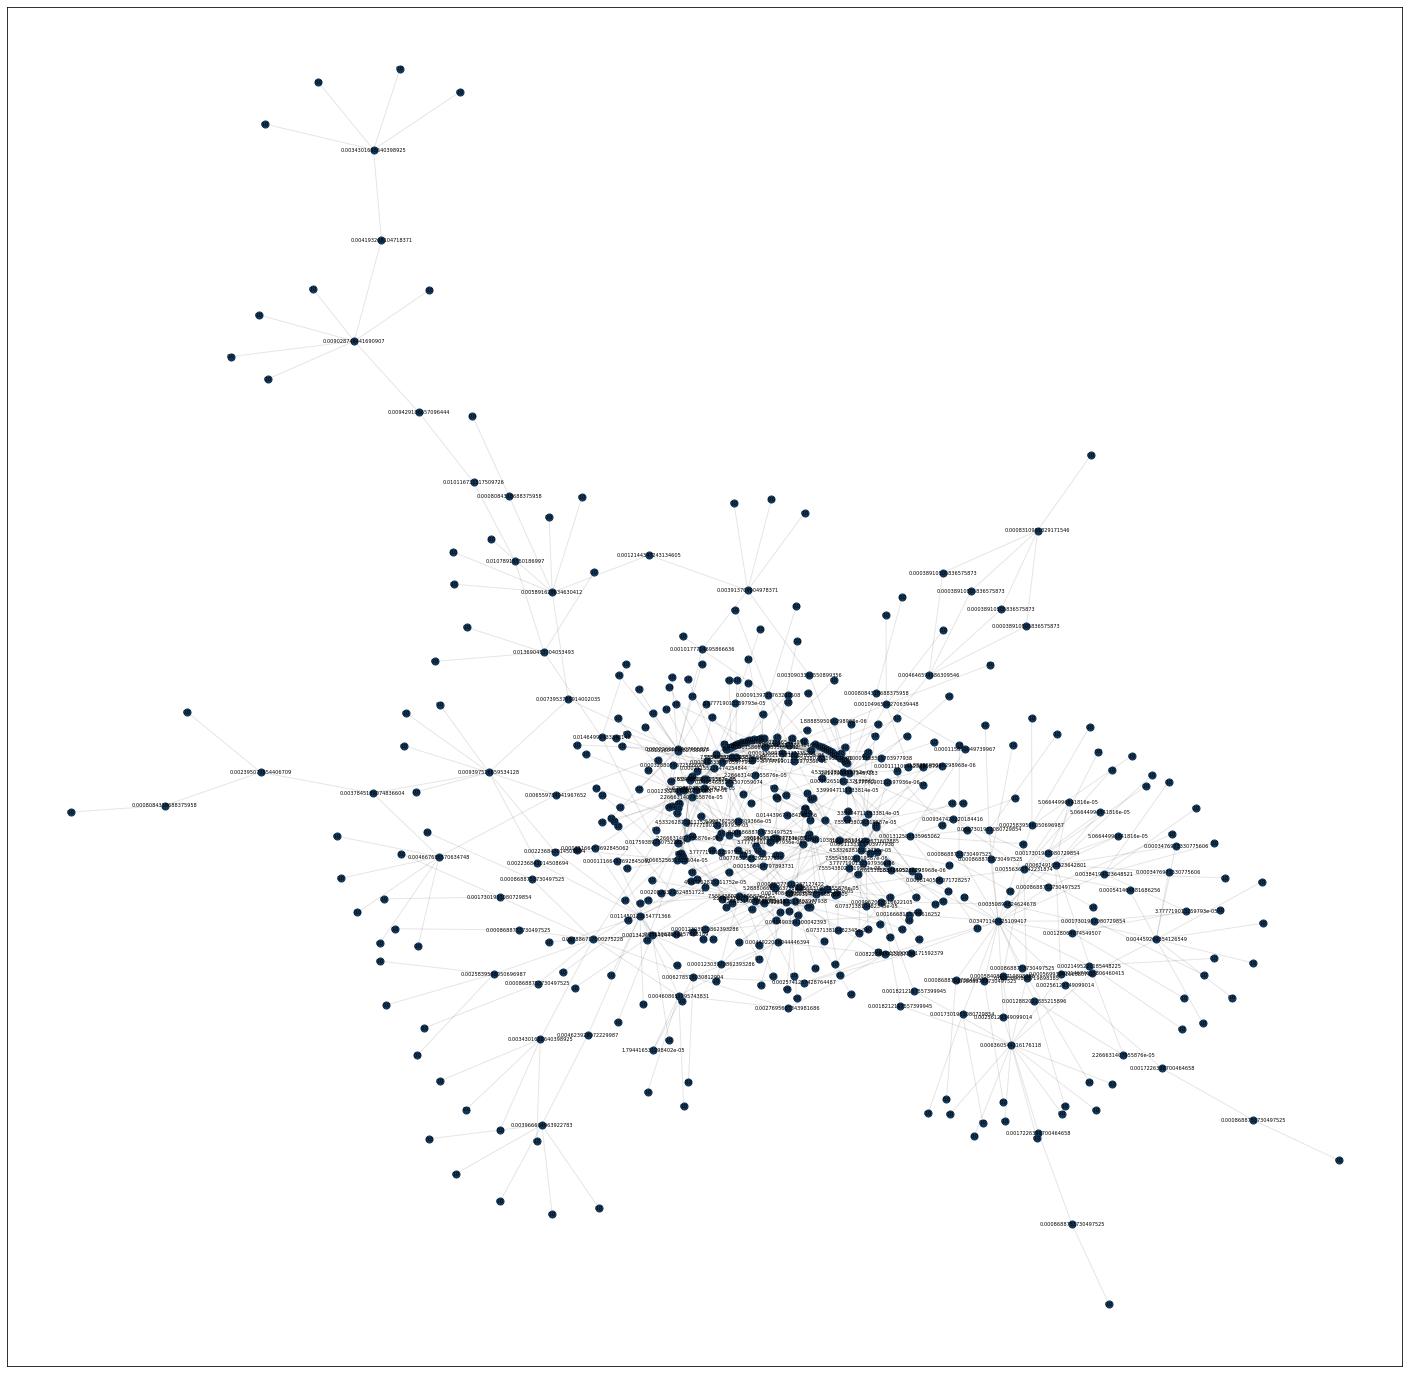

In [30]:
covid_network_betweenness = nx.from_pandas_edgelist(df,"stid","crsid")
pos = nx.kamada_kawai_layout(covid_network_betweenness)
nodes = covid_network_betweenness.nodes()
fig, axs = plt.subplots(1, 1, figsize=(25,25))
el = nx.draw_networkx_edges(covid_network_betweenness, pos, alpha=0.1, ax=axs)
nl = nx.draw_networkx_nodes(covid_network_betweenness, pos, nodelist=nodes, node_color='#123456', node_size=50, ax=axs)
ll = nx.draw_networkx_labels(covid_network, pos, font_size=5, font_family='sans-serif',labels = bet_cent)


<b>Degree Centrality </b> <br>
The degree dj of a node j is the number of edges attached to it. Nodes with high degree are called hubs and usually play an important role in the complex system modelled by the network.

In [10]:
dec_cent = nx.degree_centrality(covid_network)
df_dec_cent = pd.DataFrame.from_dict(dec_cent, orient='index', columns=['degree centrality']).sort_index()
df_dec_cent.head()


,degree centrality
1,0.009709
2,0.005825
3,0.019417
4,0.007767
5,0.013592


In [11]:
df_dec_cent.nlargest(5, ['degree centrality']) 

,degree centrality
2853,0.042718
80,0.025243
6,0.021359
2850,0.021359
3,0.019417


<b>Closeness Centrality </b><br>
The closeness centrality ci of a node i in a graph is the inverse of the mean geodesic distance from i to every other node in the network <br>

Closeness lies in the interval [0,1]: nodes with closeness approaching 1 are nodes with short distance from the other nodes, while nodes with low closeness are distant from the other nodes.

In [22]:
clos_cent = nx.closeness_centrality(covid_network)
df_clos_cent = pd.DataFrame.from_dict(clos_cent, orient='index', columns=['closeness centrality']).sort_index()
df_clos_cent.head()


,closeness centrality
1,0.009804
2,0.003922
3,0.030252
4,0.008824
5,0.030746


In [23]:
df_clos_cent.nlargest(5, ['closeness centrality']) 

,closeness centrality
5976,0.034280
80,0.032579
129,0.032068
109,0.031596
76,0.031393


A distance of 2, for example, means that while a given pair of
students is not enrolled in any courses together, the two students are enrolled in
different courses with some third student in common

In [24]:
p=dict(nx.shortest_path_length(covid_network))

In [25]:
for node1 in p:
    for node2 in p[node1]:
        print("Length between", node1, "and", node2, "is", p[node1][node2])

Length between 1 and 1 is 0
Length between 1 and 3520 is 1
Length between 1 and 3525 is 1
Length between 1 and 3532 is 1
Length between 1 and 3533 is 1
Length between 1 and 3515 is 1
Length between 3533 and 3533 is 0
Length between 3533 and 1 is 1
Length between 3533 and 3520 is 2
Length between 3533 and 3525 is 2
Length between 3533 and 3532 is 2
Length between 3533 and 3515 is 2
Length between 3532 and 3532 is 0
Length between 3532 and 1 is 1
Length between 3532 and 3520 is 2
Length between 3532 and 3525 is 2
Length between 3532 and 3533 is 2
Length between 3532 and 3515 is 2
Length between 3525 and 3525 is 0
Length between 3525 and 1 is 1
Length between 3525 and 3520 is 2
Length between 3525 and 3532 is 2
Length between 3525 and 3533 is 2
Length between 3525 and 3515 is 2
Length between 3520 and 3520 is 0
Length between 3520 and 1 is 1
Length between 3520 and 3525 is 2
Length between 3520 and 3532 is 2
Length between 3520 and 3533 is 2
Length between 3520 and 3515 is 2
Length betwee

Length between 4445 and 4342 is 4
Length between 4445 and 4349 is 4
Length between 4357 and 4357 is 0
Length between 4357 and 3 is 1
Length between 4357 and 139 is 1
Length between 4357 and 4354 is 2
Length between 4357 and 4422 is 2
Length between 4357 and 4360 is 2
Length between 4357 and 4363 is 2
Length between 4357 and 4429 is 2
Length between 4357 and 4335 is 2
Length between 4357 and 4336 is 2
Length between 4357 and 4275 is 2
Length between 4357 and 4340 is 2
Length between 4357 and 4341 is 2
Length between 4357 and 4277 is 2
Length between 4357 and 4345 is 2
Length between 4357 and 4347 is 2
Length between 4357 and 4445 is 2
Length between 4357 and 4350 is 2
Length between 4357 and 80 is 3
Length between 4357 and 83 is 3
Length between 4357 and 148 is 3
Length between 4357 and 4355 is 4
Length between 4357 and 4356 is 4
Length between 4357 and 4361 is 4
Length between 4357 and 4279 is 4
Length between 4357 and 4424 is 4
Length between 4357 and 4430 is 4
Length between 4357 and

Length between 6002 and 5959 is 4
Length between 6002 and 5963 is 4
Length between 6002 and 5966 is 4
Length between 6002 and 5967 is 4
Length between 6002 and 5968 is 4
Length between 6002 and 5972 is 4
Length between 6002 and 5973 is 4
Length between 6002 and 5974 is 4
Length between 6002 and 5975 is 4
Length between 6002 and 5977 is 4
Length between 6002 and 5978 is 4
Length between 6002 and 5982 is 4
Length between 6002 and 5991 is 4
Length between 6002 and 5994 is 4
Length between 6002 and 5996 is 4
Length between 6002 and 5998 is 4
Length between 6002 and 6000 is 4
Length between 6002 and 6009 is 4
Length between 6002 and 6010 is 4
Length between 6002 and 6011 is 4
Length between 6002 and 6015 is 4
Length between 5995 and 5995 is 0
Length between 5995 and 9 is 1
Length between 5995 and 129 is 1
Length between 5995 and 11 is 1
Length between 5995 and 5 is 1
Length between 5995 and 6016 is 2
Length between 5995 and 5955 is 2
Length between 5995 and 5957 is 2
Length between 5995 and

Length between 4309 and 4296 is 6
Length between 4309 and 4906 is 6
Length between 4309 and 4334 is 6
Length between 4309 and 4248 is 6
Length between 4309 and 4252 is 6
Length between 4309 and 65 is 7
Length between 4309 and 123 is 7
Length between 4309 and 93 is 7
Length between 4309 and 2947 is 8
Length between 4309 and 4227 is 8
Length between 4309 and 4235 is 8
Length between 4309 and 4237 is 8
Length between 4309 and 4246 is 8
Length between 4309 and 4247 is 8
Length between 4309 and 3100 is 8
Length between 4309 and 4290 is 8
Length between 4309 and 4293 is 8
Length between 4309 and 74 is 8
Length between 4309 and 4298 is 8
Length between 4309 and 4304 is 8
Length between 4309 and 5721 is 8
Length between 4309 and 4317 is 8
Length between 4309 and 4327 is 8
Length between 4309 and 1646 is 9
Length between 4309 and 91 is 9
Length between 4309 and 3820 is 10
Length between 4309 and 3759 is 10
Length between 4309 and 4666 is 10
Length between 4309 and 3804 is 10
Length between 4309

Length between 11 and 5998 is 1
Length between 11 and 5967 is 1
Length between 11 and 6011 is 1
Length between 11 and 129 is 2
Length between 11 and 5 is 2
Length between 11 and 9 is 2
Length between 11 and 76 is 2
Length between 11 and 114 is 2
Length between 11 and 6016 is 3
Length between 11 and 5953 is 3
Length between 11 and 5957 is 3
Length between 11 and 5959 is 3
Length between 11 and 5963 is 3
Length between 11 and 5964 is 3
Length between 11 and 5965 is 3
Length between 11 and 5966 is 3
Length between 11 and 5969 is 3
Length between 11 and 5972 is 3
Length between 11 and 5973 is 3
Length between 11 and 5974 is 3
Length between 11 and 5975 is 3
Length between 11 and 5976 is 3
Length between 11 and 5977 is 3
Length between 11 and 5978 is 3
Length between 11 and 5982 is 3
Length between 11 and 5996 is 3
Length between 11 and 6002 is 3
Length between 11 and 6003 is 3
Length between 11 and 6009 is 3
Length between 11 and 6010 is 3
Length between 11 and 6015 is 3
Length between 11 

Length between 5943 and 5985 is 2
Length between 5943 and 5944 is 2
Length between 5943 and 5945 is 2
Length between 5943 and 5980 is 2
Length between 17 and 17 is 0
Length between 17 and 4610 is 1
Length between 17 and 1643 is 1
Length between 1643 and 1643 is 0
Length between 1643 and 17 is 1
Length between 1643 and 4610 is 2
Length between 4610 and 4610 is 0
Length between 4610 and 17 is 1
Length between 4610 and 1643 is 2
Length between 18 and 18 is 0
Length between 18 and 2147 is 1
Length between 18 and 3844 is 1
Length between 18 and 1895 is 1
Length between 3844 and 3844 is 0
Length between 3844 and 18 is 1
Length between 3844 and 2147 is 2
Length between 3844 and 1895 is 2
Length between 1895 and 1895 is 0
Length between 1895 and 18 is 1
Length between 1895 and 2147 is 2
Length between 1895 and 3844 is 2
Length between 2147 and 2147 is 0
Length between 2147 and 18 is 1
Length between 2147 and 3844 is 2
Length between 2147 and 1895 is 2
Length between 19 and 19 is 0
Length betwe

Length between 4359 and 4326 is 6
Length between 4359 and 4296 is 6
Length between 4359 and 4906 is 6
Length between 4359 and 4334 is 6
Length between 4359 and 4248 is 6
Length between 4359 and 4252 is 6
Length between 4359 and 65 is 7
Length between 4359 and 123 is 7
Length between 4359 and 93 is 7
Length between 4359 and 2947 is 8
Length between 4359 and 4227 is 8
Length between 4359 and 4235 is 8
Length between 4359 and 4237 is 8
Length between 4359 and 4246 is 8
Length between 4359 and 4247 is 8
Length between 4359 and 3100 is 8
Length between 4359 and 4290 is 8
Length between 4359 and 4293 is 8
Length between 4359 and 74 is 8
Length between 4359 and 4298 is 8
Length between 4359 and 4304 is 8
Length between 4359 and 5721 is 8
Length between 4359 and 4317 is 8
Length between 4359 and 4327 is 8
Length between 4359 and 1646 is 9
Length between 4359 and 91 is 9
Length between 4359 and 3820 is 10
Length between 4359 and 3759 is 10
Length between 4359 and 4666 is 10
Length between 4359 

Length between 3514 and 109 is 4
Length between 3514 and 19 is 4
Length between 3514 and 4419 is 5
Length between 3514 and 4259 is 5
Length between 3514 and 4326 is 5
Length between 3514 and 4359 is 5
Length between 3514 and 4296 is 5
Length between 3514 and 4328 is 5
Length between 3514 and 4906 is 5
Length between 3514 and 4334 is 5
Length between 3514 and 4273 is 5
Length between 3514 and 4309 is 5
Length between 3514 and 4248 is 5
Length between 3514 and 4313 is 5
Length between 3514 and 4252 is 5
Length between 3514 and 65 is 6
Length between 3514 and 123 is 6
Length between 3514 and 93 is 6
Length between 3514 and 2947 is 7
Length between 3514 and 4227 is 7
Length between 3514 and 4235 is 7
Length between 3514 and 4237 is 7
Length between 3514 and 4246 is 7
Length between 3514 and 4247 is 7
Length between 3514 and 3100 is 7
Length between 3514 and 4290 is 7
Length between 3514 and 4293 is 7
Length between 3514 and 74 is 7
Length between 3514 and 4298 is 7
Length between 3514 and 

Length between 190 and 1772 is 2
Length between 190 and 3758 is 2
Length between 190 and 2452 is 2
Length between 190 and 2101 is 2
Length between 190 and 5172 is 2
Length between 190 and 188 is 2
Length between 3754 and 3754 is 0
Length between 3754 and 54 is 1
Length between 3754 and 1772 is 2
Length between 3754 and 3758 is 2
Length between 3754 and 2452 is 2
Length between 3754 and 2101 is 2
Length between 3754 and 5172 is 2
Length between 3754 and 188 is 2
Length between 3754 and 190 is 2
Length between 5172 and 5172 is 0
Length between 5172 and 54 is 1
Length between 5172 and 3754 is 2
Length between 5172 and 1772 is 2
Length between 5172 and 3758 is 2
Length between 5172 and 2452 is 2
Length between 5172 and 2101 is 2
Length between 5172 and 188 is 2
Length between 5172 and 190 is 2
Length between 3758 and 3758 is 0
Length between 3758 and 54 is 1
Length between 3758 and 3754 is 2
Length between 3758 and 1772 is 2
Length between 3758 and 2452 is 2
Length between 3758 and 2101 is

Length between 74 and 4330 is 6
Length between 74 and 4235 is 6
Length between 74 and 4227 is 6
Length between 74 and 4237 is 6
Length between 74 and 4272 is 6
Length between 74 and 4305 is 6
Length between 74 and 4304 is 6
Length between 74 and 4317 is 6
Length between 74 and 19 is 7
Length between 74 and 3514 is 7
Length between 74 and 91 is 7
Length between 74 and 4359 is 8
Length between 74 and 4328 is 8
Length between 74 and 3820 is 8
Length between 74 and 3759 is 8
Length between 74 and 4273 is 8
Length between 74 and 4309 is 8
Length between 74 and 4313 is 8
Length between 74 and 4666 is 8
Length between 74 and 3804 is 8
Length between 74 and 3805 is 8
Length between 4296 and 4296 is 0
Length between 4296 and 65 is 1
Length between 4296 and 123 is 1
Length between 4296 and 109 is 1
Length between 4296 and 2947 is 2
Length between 4296 and 4419 is 2
Length between 4296 and 4291 is 2
Length between 4296 and 4326 is 2
Length between 4296 and 4259 is 2
Length between 4296 and 74 is 

Length between 4330 and 4309 is 4
Length between 4330 and 4248 is 4
Length between 4330 and 4313 is 4
Length between 4330 and 4252 is 4
Length between 4330 and 65 is 5
Length between 4330 and 123 is 5
Length between 4330 and 93 is 5
Length between 4330 and 2947 is 6
Length between 4330 and 4227 is 6
Length between 4330 and 4235 is 6
Length between 4330 and 4237 is 6
Length between 4330 and 4246 is 6
Length between 4330 and 4247 is 6
Length between 4330 and 3100 is 6
Length between 4330 and 4290 is 6
Length between 4330 and 4293 is 6
Length between 4330 and 74 is 6
Length between 4330 and 4298 is 6
Length between 4330 and 4304 is 6
Length between 4330 and 5721 is 6
Length between 4330 and 4317 is 6
Length between 4330 and 4327 is 6
Length between 4330 and 1646 is 7
Length between 4330 and 91 is 7
Length between 4330 and 3820 is 8
Length between 4330 and 3759 is 8
Length between 4330 and 4666 is 8
Length between 4330 and 3804 is 8
Length between 4330 and 3805 is 8
Length between 70 and 7

Length between 5975 and 129 is 3
Length between 5975 and 5 is 3
Length between 5975 and 9 is 3
Length between 5975 and 11 is 3
Length between 5975 and 114 is 3
Length between 5975 and 87 is 3
Length between 5975 and 6016 is 4
Length between 5975 and 5951 is 4
Length between 5975 and 5953 is 4
Length between 5975 and 5957 is 4
Length between 5975 and 5963 is 4
Length between 5975 and 5964 is 4
Length between 5975 and 5965 is 4
Length between 5975 and 5966 is 4
Length between 5975 and 5967 is 4
Length between 5975 and 5968 is 4
Length between 5975 and 5969 is 4
Length between 5975 and 5973 is 4
Length between 5975 and 5974 is 4
Length between 5975 and 5978 is 4
Length between 5975 and 5982 is 4
Length between 5975 and 5991 is 4
Length between 5975 and 5994 is 4
Length between 5975 and 5995 is 4
Length between 5975 and 5996 is 4
Length between 5975 and 6000 is 4
Length between 5975 and 6002 is 4
Length between 5975 and 6003 is 4
Length between 5975 and 6010 is 4
Length between 5975 and 60

Length between 4433 and 4424 is 2
Length between 4433 and 4361 is 2
Length between 4433 and 4335 is 2
Length between 4433 and 4431 is 2
Length between 4433 and 4340 is 2
Length between 4433 and 4342 is 2
Length between 4433 and 4279 is 2
Length between 4433 and 4442 is 2
Length between 4433 and 4349 is 2
Length between 4433 and 3 is 3
Length between 4433 and 139 is 3
Length between 4433 and 83 is 3
Length between 4433 and 148 is 3
Length between 4433 and 4354 is 4
Length between 4433 and 4357 is 4
Length between 4433 and 4360 is 4
Length between 4433 and 4363 is 4
Length between 4433 and 4275 is 4
Length between 4433 and 4277 is 4
Length between 4433 and 4422 is 4
Length between 4433 and 4429 is 4
Length between 4433 and 4430 is 4
Length between 4433 and 4432 is 4
Length between 4433 and 4441 is 4
Length between 4433 and 4445 is 4
Length between 4433 and 4336 is 4
Length between 4433 and 4337 is 4
Length between 4433 and 4339 is 4
Length between 4433 and 4341 is 4
Length between 4433 a

Length between 4579 and 1685 is 4
Length between 4579 and 1692 is 4
Length between 4579 and 48 is 5
Length between 82 and 82 is 0
Length between 82 and 1760 is 1
Length between 82 and 1954 is 1
Length between 82 and 1766 is 1
Length between 82 and 1996 is 1
Length between 82 and 3895 is 1
Length between 82 and 48 is 2
Length between 82 and 147 is 2
Length between 82 and 4579 is 3
Length between 82 and 81 is 4
Length between 82 and 287 is 5
Length between 82 and 4583 is 5
Length between 82 and 1372 is 5
Length between 82 and 4604 is 5
Length between 82 and 3261 is 5
Length between 82 and 1695 is 5
Length between 82 and 15 is 6
Length between 82 and 1696 is 7
Length between 82 and 1701 is 7
Length between 82 and 1685 is 7
Length between 82 and 1692 is 7
Length between 1766 and 1766 is 0
Length between 1766 and 82 is 1
Length between 1766 and 1760 is 2
Length between 1766 and 1954 is 2
Length between 1766 and 1996 is 2
Length between 1766 and 3895 is 2
Length between 1766 and 48 is 3
Leng

Length between 4337 and 83 is 1
Length between 4337 and 4356 is 2
Length between 4337 and 4361 is 2
Length between 4337 and 4429 is 2
Length between 4337 and 4432 is 2
Length between 4337 and 4339 is 2
Length between 4337 and 4275 is 2
Length between 4337 and 4341 is 2
Length between 4337 and 4345 is 2
Length between 4337 and 4350 is 2
Length between 4337 and 3 is 3
Length between 4337 and 139 is 3
Length between 4337 and 80 is 3
Length between 4337 and 148 is 3
Length between 4337 and 4354 is 4
Length between 4337 and 4355 is 4
Length between 4337 and 4357 is 4
Length between 4337 and 4360 is 4
Length between 4337 and 4363 is 4
Length between 4337 and 4277 is 4
Length between 4337 and 4279 is 4
Length between 4337 and 4422 is 4
Length between 4337 and 4424 is 4
Length between 4337 and 4430 is 4
Length between 4337 and 4431 is 4
Length between 4337 and 4433 is 4
Length between 4337 and 4441 is 4
Length between 4337 and 4442 is 4
Length between 4337 and 4445 is 4
Length between 4337 and

Length between 88 and 3043 is 1
Length between 3027 and 3027 is 0
Length between 3027 and 88 is 1
Length between 3027 and 1995 is 2
Length between 3027 and 3035 is 2
Length between 3027 and 3043 is 2
Length between 3035 and 3035 is 0
Length between 3035 and 88 is 1
Length between 3035 and 1995 is 2
Length between 3035 and 3027 is 2
Length between 3035 and 3043 is 2
Length between 1995 and 1995 is 0
Length between 1995 and 88 is 1
Length between 1995 and 3027 is 2
Length between 1995 and 3035 is 2
Length between 1995 and 3043 is 2
Length between 3043 and 3043 is 0
Length between 3043 and 88 is 1
Length between 3043 and 1995 is 2
Length between 3043 and 3027 is 2
Length between 3043 and 3035 is 2
Length between 89 and 89 is 0
Length between 89 and 1234 is 1
Length between 1234 and 1234 is 0
Length between 1234 and 89 is 1
Length between 90 and 90 is 0
Length between 90 and 125 is 1
Length between 90 and 1221 is 2
Length between 90 and 5894 is 2
Length between 90 and 5895 is 2
Length betw

Length between 3804 and 4419 is 4
Length between 3804 and 4227 is 4
Length between 3804 and 4293 is 4
Length between 3804 and 4327 is 4
Length between 3804 and 4235 is 4
Length between 3804 and 4237 is 4
Length between 3804 and 4334 is 4
Length between 3804 and 4304 is 4
Length between 3804 and 4317 is 4
Length between 3804 and 109 is 5
Length between 3804 and 4291 is 6
Length between 3804 and 4259 is 6
Length between 3804 and 4326 is 6
Length between 3804 and 4296 is 6
Length between 3804 and 4906 is 6
Length between 3804 and 4248 is 6
Length between 3804 and 4252 is 6
Length between 3804 and 65 is 7
Length between 3804 and 123 is 7
Length between 3804 and 69 is 7
Length between 3804 and 4449 is 8
Length between 3804 and 4289 is 8
Length between 3804 and 2947 is 8
Length between 3804 and 4292 is 8
Length between 3804 and 41 is 8
Length between 3804 and 74 is 8
Length between 3804 and 4298 is 8
Length between 3804 and 4330 is 8
Length between 3804 and 4272 is 8
Length between 3804 and 

Length between 4317 and 5721 is 6
Length between 4317 and 3100 is 6
Length between 4317 and 1646 is 7
Length between 4317 and 19 is 7
Length between 4317 and 3514 is 7
Length between 4317 and 4359 is 8
Length between 4317 and 4328 is 8
Length between 4317 and 4273 is 8
Length between 4317 and 4309 is 8
Length between 4317 and 4313 is 8
Length between 4419 and 4419 is 0
Length between 4419 and 109 is 1
Length between 4419 and 93 is 1
Length between 4419 and 4290 is 2
Length between 4419 and 4291 is 2
Length between 4419 and 4259 is 2
Length between 4419 and 4326 is 2
Length between 4419 and 4293 is 2
Length between 4419 and 4296 is 2
Length between 4419 and 4327 is 2
Length between 4419 and 4906 is 2
Length between 4419 and 4235 is 2
Length between 4419 and 4227 is 2
Length between 4419 and 4237 is 2
Length between 4419 and 4334 is 2
Length between 4419 and 4304 is 2
Length between 4419 and 4248 is 2
Length between 4419 and 4252 is 2
Length between 4419 and 4317 is 2
Length between 4419

Length between 109 and 3514 is 4
Length between 109 and 4359 is 5
Length between 109 and 4328 is 5
Length between 109 and 3820 is 5
Length between 109 and 3759 is 5
Length between 109 and 4273 is 5
Length between 109 and 4309 is 5
Length between 109 and 4313 is 5
Length between 109 and 4666 is 5
Length between 109 and 3804 is 5
Length between 109 and 3805 is 5
Length between 4326 and 4326 is 0
Length between 4326 and 109 is 1
Length between 4326 and 4291 is 2
Length between 4326 and 4419 is 2
Length between 4326 and 4259 is 2
Length between 4326 and 4296 is 2
Length between 4326 and 4906 is 2
Length between 4326 and 4334 is 2
Length between 4326 and 4248 is 2
Length between 4326 and 4252 is 2
Length between 4326 and 65 is 3
Length between 4326 and 69 is 3
Length between 4326 and 123 is 3
Length between 4326 and 93 is 3
Length between 4326 and 2947 is 4
Length between 4326 and 4227 is 4
Length between 4326 and 4235 is 4
Length between 4326 and 4237 is 4
Length between 4326 and 4246 is 4

Length between 114 and 6011 is 3
Length between 114 and 6015 is 3
Length between 5963 and 5963 is 0
Length between 5963 and 114 is 1
Length between 5963 and 5953 is 2
Length between 5963 and 5957 is 2
Length between 5963 and 5998 is 2
Length between 5963 and 5973 is 2
Length between 5963 and 5974 is 2
Length between 5963 and 5976 is 2
Length between 5963 and 6009 is 2
Length between 5963 and 129 is 3
Length between 5963 and 5 is 3
Length between 5963 and 9 is 3
Length between 5963 and 11 is 3
Length between 5963 and 76 is 3
Length between 5963 and 87 is 3
Length between 5963 and 6016 is 4
Length between 5963 and 5951 is 4
Length between 5963 and 5955 is 4
Length between 5963 and 5959 is 4
Length between 5963 and 5964 is 4
Length between 5963 and 5965 is 4
Length between 5963 and 5966 is 4
Length between 5963 and 5967 is 4
Length between 5963 and 5968 is 4
Length between 5963 and 5969 is 4
Length between 5963 and 5972 is 4
Length between 5963 and 5975 is 4
Length between 5963 and 5977 i

Length between 5721 and 4248 is 4
Length between 5721 and 69 is 5
Length between 5721 and 1646 is 5
Length between 5721 and 93 is 5
Length between 5721 and 4227 is 6
Length between 5721 and 4235 is 6
Length between 5721 and 4237 is 6
Length between 5721 and 41 is 6
Length between 5721 and 4272 is 6
Length between 5721 and 4289 is 6
Length between 5721 and 4290 is 6
Length between 5721 and 4292 is 6
Length between 5721 and 4293 is 6
Length between 5721 and 4304 is 6
Length between 5721 and 4305 is 6
Length between 5721 and 4317 is 6
Length between 5721 and 4449 is 6
Length between 5721 and 4327 is 6
Length between 5721 and 4330 is 6
Length between 5721 and 19 is 7
Length between 5721 and 3514 is 7
Length between 5721 and 91 is 7
Length between 5721 and 4359 is 8
Length between 5721 and 4328 is 8
Length between 5721 and 3820 is 8
Length between 5721 and 3759 is 8
Length between 5721 and 4273 is 8
Length between 5721 and 4309 is 8
Length between 5721 and 4313 is 8
Length between 5721 and 

Length between 5966 and 6015 is 2
Length between 5966 and 5 is 3
Length between 5966 and 9 is 3
Length between 5966 and 11 is 3
Length between 5966 and 76 is 3
Length between 5966 and 114 is 3
Length between 5966 and 87 is 3
Length between 5966 and 6016 is 4
Length between 5966 and 5951 is 4
Length between 5966 and 5953 is 4
Length between 5966 and 5957 is 4
Length between 5966 and 5959 is 4
Length between 5966 and 5963 is 4
Length between 5966 and 5964 is 4
Length between 5966 and 5965 is 4
Length between 5966 and 5967 is 4
Length between 5966 and 5968 is 4
Length between 5966 and 5969 is 4
Length between 5966 and 5972 is 4
Length between 5966 and 5975 is 4
Length between 5966 and 5977 is 4
Length between 5966 and 5991 is 4
Length between 5966 and 5994 is 4
Length between 5966 and 5996 is 4
Length between 5966 and 5998 is 4
Length between 5966 and 6000 is 4
Length between 5966 and 6002 is 4
Length between 5966 and 6003 is 4
Length between 5966 and 6009 is 4
Length between 5966 and 601

Length between 5419 and 4685 is 2
Length between 5419 and 5294 is 2
Length between 5419 and 2546 is 2
Length between 5419 and 4543 is 2
Length between 5419 and 113 is 3
Length between 5292 and 5292 is 0
Length between 5292 and 145 is 1
Length between 5292 and 1642 is 2
Length between 5292 and 5419 is 2
Length between 5292 and 4685 is 2
Length between 5292 and 5294 is 2
Length between 5292 and 2546 is 2
Length between 5292 and 4543 is 2
Length between 5292 and 113 is 3
Length between 146 and 146 is 0
Length between 146 and 2219 is 1
Length between 146 and 2215 is 1
Length between 2219 and 2219 is 0
Length between 2219 and 146 is 1
Length between 2219 and 2215 is 2
Length between 2215 and 2215 is 0
Length between 2215 and 146 is 1
Length between 2215 and 2219 is 2
Length between 147 and 147 is 0
Length between 147 and 4579 is 1
Length between 147 and 3895 is 1
Length between 147 and 81 is 2
Length between 147 and 82 is 2
Length between 147 and 1760 is 3
Length between 147 and 1954 is 3
L

<b>Finding Weak Ties </b> <br>
<b>Burt's constraint measure</b>. <br> Burt says a node occupies a structural hole if it has low constraint. One minus a node's constraint score seems to highlight the nodes in between communities quite well, though not in every case.

In [27]:
covid_network.remove_node(2853)
covid_network.remove_node(6)
covid_network.remove_node(2850)
covid_network.remove_node(144)
covid_network.remove_node(61)

NetworkXError: The node 2853 is not in the graph.

<b> Removing Most Influential Nodes

In [28]:
bet_cent = nx.betweenness_centrality(covid_network)
# turn dictionary into dataframe

df_bet_cent = pd.DataFrame.from_dict(bet_cent, orient='index', columns=['betweenness centrality']).sort_index()

df_bet_cent.head()

,betweenness centrality
1,0.000077
2,0.000008
3,0.001502
4,0.000035
5,0.001338


In [29]:
df_bet_cent.nlargest(5, ['betweenness centrality']) 

,betweenness centrality
109,0.006603
93,0.004318
69,0.004307
4291,0.003929
4296,0.002265


In [30]:
dec_cent = nx.degree_centrality(covid_network)
df_dec_cent = pd.DataFrame.from_dict(dec_cent, orient='index', columns=['degree centrality']).sort_index()
df_dec_cent.head()


,degree centrality
1,0.009804
2,0.003922
3,0.019608
4,0.007843
5,0.013725


In [31]:
df_dec_cent.nlargest(5, ['degree centrality']) 

,degree centrality
80,0.025490
3,0.019608
83,0.019608
93,0.019608
139,0.019608


In [33]:
clos_cent = nx.closeness_centrality(covid_network)
df_clos_cent = pd.DataFrame.from_dict(clos_cent, orient='index', columns=['closeness centrality']).sort_index()
df_clos_cent.head()


,closeness centrality
1,0.009804
2,0.003922
3,0.030252
4,0.008824
5,0.030746


In [35]:
df_clos_cent.nlargest(5, ['closeness centrality']) 

,closeness centrality
5976,0.034280
80,0.032579
129,0.032068
109,0.031596
76,0.031393


In [36]:
p=dict(nx.shortest_path_length(covid_network))

In [37]:
for node1 in p:
    for node2 in p[node1]:
        print("Length between", node1, "and", node2, "is", p[node1][node2])

Length between 1 and 1 is 0
Length between 1 and 3520 is 1
Length between 1 and 3525 is 1
Length between 1 and 3532 is 1
Length between 1 and 3533 is 1
Length between 1 and 3515 is 1
Length between 3533 and 3533 is 0
Length between 3533 and 1 is 1
Length between 3533 and 3520 is 2
Length between 3533 and 3525 is 2
Length between 3533 and 3532 is 2
Length between 3533 and 3515 is 2
Length between 3532 and 3532 is 0
Length between 3532 and 1 is 1
Length between 3532 and 3520 is 2
Length between 3532 and 3525 is 2
Length between 3532 and 3533 is 2
Length between 3532 and 3515 is 2
Length between 3525 and 3525 is 0
Length between 3525 and 1 is 1
Length between 3525 and 3520 is 2
Length between 3525 and 3532 is 2
Length between 3525 and 3533 is 2
Length between 3525 and 3515 is 2
Length between 3520 and 3520 is 0
Length between 3520 and 1 is 1
Length between 3520 and 3525 is 2
Length between 3520 and 3532 is 2
Length between 3520 and 3533 is 2
Length between 3520 and 3515 is 2
Length betwee

Length between 4357 and 139 is 1
Length between 4357 and 4354 is 2
Length between 4357 and 4422 is 2
Length between 4357 and 4360 is 2
Length between 4357 and 4363 is 2
Length between 4357 and 4429 is 2
Length between 4357 and 4335 is 2
Length between 4357 and 4336 is 2
Length between 4357 and 4275 is 2
Length between 4357 and 4340 is 2
Length between 4357 and 4341 is 2
Length between 4357 and 4277 is 2
Length between 4357 and 4345 is 2
Length between 4357 and 4347 is 2
Length between 4357 and 4445 is 2
Length between 4357 and 4350 is 2
Length between 4357 and 80 is 3
Length between 4357 and 83 is 3
Length between 4357 and 148 is 3
Length between 4357 and 4355 is 4
Length between 4357 and 4356 is 4
Length between 4357 and 4361 is 4
Length between 4357 and 4279 is 4
Length between 4357 and 4424 is 4
Length between 4357 and 4430 is 4
Length between 4357 and 4431 is 4
Length between 4357 and 4432 is 4
Length between 4357 and 4433 is 4
Length between 4357 and 4441 is 4
Length between 4357 

Length between 6002 and 6016 is 4
Length between 6002 and 5951 is 4
Length between 6002 and 5953 is 4
Length between 6002 and 5955 is 4
Length between 6002 and 5957 is 4
Length between 6002 and 5959 is 4
Length between 6002 and 5963 is 4
Length between 6002 and 5966 is 4
Length between 6002 and 5967 is 4
Length between 6002 and 5968 is 4
Length between 6002 and 5972 is 4
Length between 6002 and 5973 is 4
Length between 6002 and 5974 is 4
Length between 6002 and 5975 is 4
Length between 6002 and 5977 is 4
Length between 6002 and 5978 is 4
Length between 6002 and 5982 is 4
Length between 6002 and 5991 is 4
Length between 6002 and 5994 is 4
Length between 6002 and 5996 is 4
Length between 6002 and 5998 is 4
Length between 6002 and 6000 is 4
Length between 6002 and 6009 is 4
Length between 6002 and 6010 is 4
Length between 6002 and 6011 is 4
Length between 6002 and 6015 is 4
Length between 5995 and 5995 is 0
Length between 5995 and 9 is 1
Length between 5995 and 129 is 1
Length between 599

Length between 4427 and 4427 is 0
Length between 7 and 7 is 0
Length between 7 and 5946 is 1
Length between 7 and 5981 is 1
Length between 7 and 100 is 2
Length between 5981 and 5981 is 0
Length between 5981 and 100 is 1
Length between 5981 and 7 is 1
Length between 5981 and 5946 is 2
Length between 5946 and 5946 is 0
Length between 5946 and 100 is 1
Length between 5946 and 7 is 1
Length between 5946 and 5981 is 2
Length between 8 and 8 is 0
Length between 8 and 1238 is 1
Length between 1238 and 1238 is 0
Length between 1238 and 8 is 1
Length between 9 and 9 is 0
Length between 9 and 6016 is 1
Length between 9 and 5957 is 1
Length between 9 and 5995 is 1
Length between 9 and 5996 is 1
Length between 9 and 5965 is 1
Length between 9 and 5998 is 1
Length between 9 and 6010 is 1
Length between 9 and 129 is 2
Length between 9 and 5 is 2
Length between 9 and 11 is 2
Length between 9 and 76 is 2
Length between 9 and 114 is 2
Length between 9 and 5953 is 3
Length between 9 and 5955 is 3
Lengt

Length between 5991 and 5967 is 2
Length between 5991 and 6011 is 2
Length between 5991 and 129 is 3
Length between 5991 and 5 is 3
Length between 5991 and 9 is 3
Length between 5991 and 76 is 3
Length between 5991 and 114 is 3
Length between 5991 and 6016 is 4
Length between 5991 and 5953 is 4
Length between 5991 and 5957 is 4
Length between 5991 and 5959 is 4
Length between 5991 and 5963 is 4
Length between 5991 and 5964 is 4
Length between 5991 and 5965 is 4
Length between 5991 and 5966 is 4
Length between 5991 and 5969 is 4
Length between 5991 and 5972 is 4
Length between 5991 and 5973 is 4
Length between 5991 and 5974 is 4
Length between 5991 and 5975 is 4
Length between 5991 and 5976 is 4
Length between 5991 and 5977 is 4
Length between 5991 and 5978 is 4
Length between 5991 and 5982 is 4
Length between 5991 and 5996 is 4
Length between 5991 and 6002 is 4
Length between 5991 and 6003 is 4
Length between 5991 and 6009 is 4
Length between 5991 and 6010 is 4
Length between 5991 and 

Length between 19 and 4246 is 7
Length between 19 and 4247 is 7
Length between 19 and 3100 is 7
Length between 19 and 4290 is 7
Length between 19 and 4293 is 7
Length between 19 and 74 is 7
Length between 19 and 4298 is 7
Length between 19 and 4304 is 7
Length between 19 and 5721 is 7
Length between 19 and 4317 is 7
Length between 19 and 4327 is 7
Length between 19 and 1646 is 8
Length between 19 and 91 is 8
Length between 19 and 3820 is 9
Length between 19 and 3759 is 9
Length between 19 and 4666 is 9
Length between 19 and 3804 is 9
Length between 19 and 3805 is 9
Length between 4328 and 4328 is 0
Length between 4328 and 19 is 1
Length between 4328 and 4289 is 2
Length between 4328 and 4359 is 2
Length between 4328 and 4273 is 2
Length between 4328 and 4309 is 2
Length between 4328 and 4313 is 2
Length between 4328 and 69 is 3
Length between 4328 and 4449 is 4
Length between 4328 and 4291 is 4
Length between 4328 and 4292 is 4
Length between 4328 and 41 is 4
Length between 4328 and 43

Length between 55 and 55 is 0
Length between 55 and 2969 is 1
Length between 55 and 26 is 1
Length between 55 and 4732 is 1
Length between 27 and 27 is 0
Length between 27 and 3412 is 1
Length between 3412 and 3412 is 0
Length between 3412 and 27 is 1
Length between 28 and 28 is 0
Length between 28 and 3065 is 1
Length between 3065 and 3065 is 0
Length between 3065 and 28 is 1
Length between 29 and 29 is 0
Length between 29 and 532 is 1
Length between 532 and 532 is 0
Length between 532 and 29 is 1
Length between 30 and 30 is 0
Length between 30 and 1945 is 1
Length between 1945 and 1945 is 0
Length between 1945 and 30 is 1
Length between 31 and 31 is 0
Length between 31 and 3333 is 1
Length between 3333 and 3333 is 0
Length between 3333 and 31 is 1
Length between 32 and 32 is 0
Length between 32 and 567 is 1
Length between 567 and 567 is 0
Length between 567 and 32 is 1
Length between 33 and 33 is 0
Length between 33 and 3054 is 1
Length between 3054 and 3054 is 0
Length between 3054 

Length between 4681 and 4673 is 2
Length between 4681 and 4713 is 2
Length between 4681 and 4684 is 2
Length between 4681 and 4695 is 2
Length between 4681 and 4728 is 2
Length between 4681 and 43 is 3
Length between 4681 and 4693 is 4
Length between 4681 and 4687 is 4
Length between 4713 and 4713 is 0
Length between 4713 and 44 is 1
Length between 4713 and 4673 is 2
Length between 4713 and 4681 is 2
Length between 4713 and 4684 is 2
Length between 4713 and 4695 is 2
Length between 4713 and 4728 is 2
Length between 4713 and 43 is 3
Length between 4713 and 4693 is 4
Length between 4713 and 4687 is 4
Length between 4728 and 4728 is 0
Length between 4728 and 44 is 1
Length between 4728 and 4673 is 2
Length between 4728 and 4681 is 2
Length between 4728 and 4713 is 2
Length between 4728 and 4684 is 2
Length between 4728 and 4695 is 2
Length between 4728 and 43 is 3
Length between 4728 and 4693 is 4
Length between 4728 and 4687 is 4
Length between 45 and 45 is 0
Length between 45 and 5752 i

Length between 4252 and 74 is 4
Length between 4252 and 4304 is 4
Length between 4252 and 4305 is 4
Length between 4252 and 4317 is 4
Length between 4252 and 4449 is 4
Length between 4252 and 4327 is 4
Length between 4252 and 4330 is 4
Length between 4252 and 1646 is 5
Length between 4252 and 19 is 5
Length between 4252 and 3514 is 5
Length between 4252 and 91 is 5
Length between 4252 and 4359 is 6
Length between 4252 and 4328 is 6
Length between 4252 and 3820 is 6
Length between 4252 and 3759 is 6
Length between 4252 and 4273 is 6
Length between 4252 and 4309 is 6
Length between 4252 and 4313 is 6
Length between 4252 and 4666 is 6
Length between 4252 and 3804 is 6
Length between 4252 and 3805 is 6
Length between 4241 and 4241 is 0
Length between 62 and 62 is 0
Length between 62 and 3977 is 1
Length between 62 and 4294 is 1
Length between 3977 and 3977 is 0
Length between 3977 and 62 is 1
Length between 3977 and 4294 is 2
Length between 4294 and 4294 is 0
Length between 4294 and 62 is 

Length between 69 and 4227 is 5
Length between 69 and 4235 is 5
Length between 69 and 4237 is 5
Length between 69 and 4246 is 5
Length between 69 and 4247 is 5
Length between 69 and 3100 is 5
Length between 69 and 4290 is 5
Length between 69 and 4293 is 5
Length between 69 and 74 is 5
Length between 69 and 4298 is 5
Length between 69 and 4304 is 5
Length between 69 and 5721 is 5
Length between 69 and 4317 is 5
Length between 69 and 4327 is 5
Length between 69 and 1646 is 6
Length between 69 and 91 is 6
Length between 69 and 3820 is 7
Length between 69 and 3759 is 7
Length between 69 and 4666 is 7
Length between 69 and 3804 is 7
Length between 69 and 3805 is 7
Length between 4292 and 4292 is 0
Length between 4292 and 69 is 1
Length between 4292 and 4449 is 2
Length between 4292 and 4289 is 2
Length between 4292 and 4291 is 2
Length between 4292 and 41 is 2
Length between 4292 and 4330 is 2
Length between 4292 and 4272 is 2
Length between 4292 and 4305 is 2
Length between 4292 and 3514 i

Length between 1646 and 4248 is 5
Length between 1646 and 5721 is 5
Length between 1646 and 4252 is 5
Length between 1646 and 69 is 6
Length between 1646 and 93 is 6
Length between 1646 and 4449 is 7
Length between 1646 and 4289 is 7
Length between 1646 and 4292 is 7
Length between 1646 and 4293 is 7
Length between 1646 and 4327 is 7
Length between 1646 and 4290 is 7
Length between 1646 and 41 is 7
Length between 1646 and 4330 is 7
Length between 1646 and 4235 is 7
Length between 1646 and 4227 is 7
Length between 1646 and 4237 is 7
Length between 1646 and 4272 is 7
Length between 1646 and 4305 is 7
Length between 1646 and 4304 is 7
Length between 1646 and 4317 is 7
Length between 1646 and 19 is 8
Length between 1646 and 3514 is 8
Length between 1646 and 91 is 8
Length between 1646 and 4359 is 9
Length between 1646 and 4328 is 9
Length between 1646 and 3820 is 9
Length between 1646 and 3759 is 9
Length between 1646 and 4273 is 9
Length between 1646 and 4309 is 9
Length between 1646 and 

Length between 80 and 148 is 2
Length between 80 and 4354 is 3
Length between 80 and 4357 is 3
Length between 80 and 4360 is 3
Length between 80 and 4363 is 3
Length between 80 and 4275 is 3
Length between 80 and 4277 is 3
Length between 80 and 4422 is 3
Length between 80 and 4429 is 3
Length between 80 and 4430 is 3
Length between 80 and 4432 is 3
Length between 80 and 4441 is 3
Length between 80 and 4445 is 3
Length between 80 and 4336 is 3
Length between 80 and 4337 is 3
Length between 80 and 4339 is 3
Length between 80 and 4341 is 3
Length between 80 and 4345 is 3
Length between 80 and 4347 is 3
Length between 80 and 4350 is 3
Length between 4349 and 4349 is 0
Length between 4349 and 80 is 1
Length between 4349 and 148 is 1
Length between 4349 and 4448 is 2
Length between 4349 and 4355 is 2
Length between 4349 and 4356 is 2
Length between 4349 and 4422 is 2
Length between 4349 and 4424 is 2
Length between 4349 and 4361 is 2
Length between 4349 and 4430 is 2
Length between 4349 and 

Length between 4335 and 4430 is 4
Length between 4335 and 4432 is 4
Length between 4335 and 4441 is 4
Length between 4335 and 4336 is 4
Length between 4335 and 4337 is 4
Length between 4335 and 4339 is 4
Length between 4335 and 4341 is 4
Length between 4335 and 4347 is 4
Length between 4355 and 4355 is 0
Length between 4355 and 80 is 1
Length between 4355 and 4448 is 2
Length between 4355 and 4356 is 2
Length between 4355 and 4424 is 2
Length between 4355 and 4361 is 2
Length between 4355 and 4335 is 2
Length between 4355 and 4431 is 2
Length between 4355 and 4433 is 2
Length between 4355 and 4340 is 2
Length between 4355 and 4342 is 2
Length between 4355 and 4279 is 2
Length between 4355 and 4442 is 2
Length between 4355 and 4349 is 2
Length between 4355 and 3 is 3
Length between 4355 and 139 is 3
Length between 4355 and 83 is 3
Length between 4355 and 148 is 3
Length between 4355 and 4354 is 4
Length between 4355 and 4357 is 4
Length between 4355 and 4360 is 4
Length between 4355 and

Length between 1954 and 1685 is 8
Length between 1954 and 1692 is 8
Length between 3895 and 3895 is 0
Length between 3895 and 82 is 1
Length between 3895 and 147 is 1
Length between 3895 and 1760 is 2
Length between 3895 and 1954 is 2
Length between 3895 and 4579 is 2
Length between 3895 and 1766 is 2
Length between 3895 and 1996 is 2
Length between 3895 and 48 is 3
Length between 3895 and 81 is 3
Length between 3895 and 287 is 4
Length between 3895 and 4583 is 4
Length between 3895 and 1372 is 4
Length between 3895 and 4604 is 4
Length between 3895 and 3261 is 4
Length between 3895 and 1695 is 4
Length between 3895 and 15 is 5
Length between 3895 and 1696 is 6
Length between 3895 and 1701 is 6
Length between 3895 and 1685 is 6
Length between 3895 and 1692 is 6
Length between 1996 and 1996 is 0
Length between 1996 and 82 is 1
Length between 1996 and 1760 is 2
Length between 1996 and 1954 is 2
Length between 1996 and 1766 is 2
Length between 1996 and 3895 is 2
Length between 1996 and 48

Length between 85 and 5283 is 1
Length between 5283 and 5283 is 0
Length between 5283 and 85 is 1
Length between 86 and 86 is 0
Length between 86 and 5649 is 1
Length between 86 and 363 is 1
Length between 86 and 372 is 1
Length between 86 and 36 is 2
Length between 363 and 363 is 0
Length between 363 and 86 is 1
Length between 363 and 5649 is 2
Length between 363 and 372 is 2
Length between 363 and 36 is 3
Length between 5649 and 5649 is 0
Length between 5649 and 86 is 1
Length between 5649 and 363 is 2
Length between 5649 and 372 is 2
Length between 5649 and 36 is 3
Length between 87 and 87 is 0
Length between 87 and 5959 is 1
Length between 87 and 5994 is 1
Length between 87 and 6000 is 1
Length between 87 and 5968 is 1
Length between 87 and 5972 is 1
Length between 87 and 5976 is 1
Length between 87 and 5978 is 1
Length between 87 and 5982 is 1
Length between 87 and 5951 is 1
Length between 87 and 129 is 2
Length between 87 and 5 is 2
Length between 87 and 76 is 2
Length between 87

Length between 91 and 3759 is 1
Length between 91 and 4666 is 1
Length between 91 and 3804 is 1
Length between 91 and 3805 is 1
Length between 91 and 93 is 2
Length between 91 and 4419 is 3
Length between 91 and 4227 is 3
Length between 91 and 4293 is 3
Length between 91 and 4327 is 3
Length between 91 and 4235 is 3
Length between 91 and 4237 is 3
Length between 91 and 4334 is 3
Length between 91 and 4304 is 3
Length between 91 and 4317 is 3
Length between 91 and 109 is 4
Length between 91 and 4291 is 5
Length between 91 and 4259 is 5
Length between 91 and 4326 is 5
Length between 91 and 4296 is 5
Length between 91 and 4906 is 5
Length between 91 and 4248 is 5
Length between 91 and 4252 is 5
Length between 91 and 65 is 6
Length between 91 and 123 is 6
Length between 91 and 69 is 6
Length between 91 and 4449 is 7
Length between 91 and 4289 is 7
Length between 91 and 2947 is 7
Length between 91 and 4292 is 7
Length between 91 and 41 is 7
Length between 91 and 74 is 7
Length between 91 an

Length between 3759 and 1646 is 9
Length between 3759 and 19 is 9
Length between 3759 and 3514 is 9
Length between 3759 and 4359 is 10
Length between 3759 and 4328 is 10
Length between 3759 and 4273 is 10
Length between 3759 and 4309 is 10
Length between 3759 and 4313 is 10
Length between 3804 and 3804 is 0
Length between 3804 and 91 is 1
Length between 3804 and 4290 is 2
Length between 3804 and 3820 is 2
Length between 3804 and 3759 is 2
Length between 3804 and 4666 is 2
Length between 3804 and 3805 is 2
Length between 3804 and 93 is 3
Length between 3804 and 4419 is 4
Length between 3804 and 4227 is 4
Length between 3804 and 4293 is 4
Length between 3804 and 4327 is 4
Length between 3804 and 4235 is 4
Length between 3804 and 4237 is 4
Length between 3804 and 4334 is 4
Length between 3804 and 4304 is 4
Length between 3804 and 4317 is 4
Length between 3804 and 109 is 5
Length between 3804 and 4291 is 6
Length between 3804 and 4259 is 6
Length between 3804 and 4326 is 6
Length between 3

Length between 4327 and 4246 is 6
Length between 4327 and 4247 is 6
Length between 4327 and 5721 is 6
Length between 4327 and 3100 is 6
Length between 4327 and 1646 is 7
Length between 4327 and 19 is 7
Length between 4327 and 3514 is 7
Length between 4327 and 4359 is 8
Length between 4327 and 4328 is 8
Length between 4327 and 4273 is 8
Length between 4327 and 4309 is 8
Length between 4327 and 4313 is 8
Length between 4317 and 4317 is 0
Length between 4317 and 93 is 1
Length between 4317 and 4290 is 2
Length between 4317 and 4419 is 2
Length between 4317 and 4227 is 2
Length between 4317 and 4293 is 2
Length between 4317 and 4327 is 2
Length between 4317 and 4235 is 2
Length between 4317 and 4237 is 2
Length between 4317 and 4334 is 2
Length between 4317 and 4304 is 2
Length between 4317 and 109 is 3
Length between 4317 and 91 is 3
Length between 4317 and 4291 is 4
Length between 4317 and 4259 is 4
Length between 4317 and 4326 is 4
Length between 4317 and 3804 is 4
Length between 4317 a

Length between 101 and 90 is 5
Length between 102 and 102 is 0
Length between 102 and 5939 is 1
Length between 102 and 5894 is 1
Length between 102 and 5895 is 1
Length between 102 and 67 is 2
Length between 102 and 101 is 2
Length between 102 and 40 is 2
Length between 102 and 125 is 2
Length between 102 and 1221 is 3
Length between 102 and 1194 is 3
Length between 102 and 1196 is 3
Length between 102 and 823 is 3
Length between 102 and 90 is 3
Length between 103 and 103 is 0
Length between 103 and 844 is 1
Length between 103 and 2583 is 1
Length between 103 and 117 is 2
Length between 844 and 844 is 0
Length between 844 and 117 is 1
Length between 844 and 103 is 1
Length between 844 and 2583 is 2
Length between 2583 and 2583 is 0
Length between 2583 and 103 is 1
Length between 2583 and 844 is 2
Length between 2583 and 117 is 3
Length between 104 and 104 is 0
Length between 104 and 4401 is 1
Length between 4401 and 4401 is 0
Length between 4401 and 104 is 1
Length between 105 and 105 

Length between 110 and 5259 is 1
Length between 110 and 5270 is 1
Length between 5270 and 5270 is 0
Length between 5270 and 110 is 1
Length between 5270 and 4624 is 2
Length between 5270 and 1393 is 2
Length between 5270 and 5259 is 2
Length between 4624 and 4624 is 0
Length between 4624 and 110 is 1
Length between 4624 and 1393 is 2
Length between 4624 and 5259 is 2
Length between 4624 and 5270 is 2
Length between 5259 and 5259 is 0
Length between 5259 and 110 is 1
Length between 5259 and 4624 is 2
Length between 5259 and 1393 is 2
Length between 5259 and 5270 is 2
Length between 1393 and 1393 is 0
Length between 1393 and 110 is 1
Length between 1393 and 4624 is 2
Length between 1393 and 5259 is 2
Length between 1393 and 5270 is 2
Length between 111 and 111 is 0
Length between 111 and 3697 is 1
Length between 111 and 3708 is 1
Length between 111 and 132 is 2
Length between 111 and 3709 is 3
Length between 111 and 3710 is 3
Length between 3697 and 3697 is 0
Length between 3697 and 132 

Length between 5973 and 9 is 3
Length between 5973 and 11 is 3
Length between 5973 and 76 is 3
Length between 5973 and 87 is 3
Length between 5973 and 6016 is 4
Length between 5973 and 5951 is 4
Length between 5973 and 5959 is 4
Length between 5973 and 5964 is 4
Length between 5973 and 5965 is 4
Length between 5973 and 5967 is 4
Length between 5973 and 5968 is 4
Length between 5973 and 5969 is 4
Length between 5973 and 5972 is 4
Length between 5973 and 5975 is 4
Length between 5973 and 5977 is 4
Length between 5973 and 5991 is 4
Length between 5973 and 5994 is 4
Length between 5973 and 5996 is 4
Length between 5973 and 6000 is 4
Length between 5973 and 6002 is 4
Length between 5973 and 6003 is 4
Length between 5973 and 6010 is 4
Length between 5973 and 6011 is 4
Length between 115 and 115 is 0
Length between 115 and 678 is 1
Length between 115 and 3724 is 1
Length between 115 and 3987 is 1
Length between 115 and 5171 is 1
Length between 115 and 2931 is 1
Length between 115 and 66 is 2


Length between 4247 and 5721 is 2
Length between 4247 and 4252 is 2
Length between 4247 and 65 is 3
Length between 4247 and 109 is 3
Length between 4247 and 2947 is 4
Length between 4247 and 4419 is 4
Length between 4247 and 4291 is 4
Length between 4247 and 4326 is 4
Length between 4247 and 4259 is 4
Length between 4247 and 74 is 4
Length between 4247 and 4906 is 4
Length between 4247 and 4334 is 4
Length between 4247 and 4248 is 4
Length between 4247 and 69 is 5
Length between 4247 and 1646 is 5
Length between 4247 and 93 is 5
Length between 4247 and 4227 is 6
Length between 4247 and 4235 is 6
Length between 4247 and 4237 is 6
Length between 4247 and 41 is 6
Length between 4247 and 4272 is 6
Length between 4247 and 4289 is 6
Length between 4247 and 4290 is 6
Length between 4247 and 4292 is 6
Length between 4247 and 4293 is 6
Length between 4247 and 4304 is 6
Length between 4247 and 4305 is 6
Length between 4247 and 4317 is 6
Length between 4247 and 4449 is 6
Length between 4247 and 4

Length between 6015 and 5991 is 4
Length between 6015 and 5994 is 4
Length between 6015 and 5996 is 4
Length between 6015 and 5998 is 4
Length between 6015 and 6000 is 4
Length between 6015 and 6002 is 4
Length between 6015 and 6003 is 4
Length between 6015 and 6009 is 4
Length between 6015 and 6010 is 4
Length between 6015 and 6011 is 4
Length between 131 and 131 is 0
Length between 131 and 2437 is 1
Length between 131 and 2430 is 1
Length between 2437 and 2437 is 0
Length between 2437 and 131 is 1
Length between 2437 and 2430 is 2
Length between 2430 and 2430 is 0
Length between 2430 and 131 is 1
Length between 2430 and 2437 is 2
Length between 132 and 132 is 0
Length between 132 and 3697 is 1
Length between 132 and 3709 is 1
Length between 132 and 3710 is 1
Length between 132 and 111 is 2
Length between 132 and 3708 is 3
Length between 3709 and 3709 is 0
Length between 3709 and 132 is 1
Length between 3709 and 3697 is 2
Length between 3709 and 3710 is 2
Length between 3709 and 111 i

Length between 5294 and 4685 is 2
Length between 5294 and 2546 is 2
Length between 5294 and 4543 is 2
Length between 5294 and 113 is 3
Length between 5419 and 5419 is 0
Length between 5419 and 145 is 1
Length between 5419 and 1642 is 2
Length between 5419 and 5292 is 2
Length between 5419 and 4685 is 2
Length between 5419 and 5294 is 2
Length between 5419 and 2546 is 2
Length between 5419 and 4543 is 2
Length between 5419 and 113 is 3
Length between 5292 and 5292 is 0
Length between 5292 and 145 is 1
Length between 5292 and 1642 is 2
Length between 5292 and 5419 is 2
Length between 5292 and 4685 is 2
Length between 5292 and 5294 is 2
Length between 5292 and 2546 is 2
Length between 5292 and 4543 is 2
Length between 5292 and 113 is 3
Length between 146 and 146 is 0
Length between 146 and 2219 is 1
Length between 146 and 2215 is 1
Length between 2219 and 2219 is 0
Length between 2219 and 146 is 1
Length between 2219 and 2215 is 2
Length between 2215 and 2215 is 0
Length between 2215 and 

<b> Removing Random Nodes 

In [39]:
covid_network.remove_node(80)
covid_network.remove_node(3)


In [40]:
bet_cent = nx.betweenness_centrality(covid_network)
# turn dictionary into dataframe

df_bet_cent = pd.DataFrame.from_dict(bet_cent, orient='index', columns=['betweenness centrality']).sort_index()

df_bet_cent.head()

,betweenness centrality
1,0.000078
2,0.000008
4,0.000035
5,0.001349
7,0.000004


In [41]:
df_bet_cent.nlargest(5, ['betweenness centrality']) 

,betweenness centrality
109,0.006655
93,0.004352
69,0.004341
4291,0.003960
4296,0.002283


In [42]:
dec_cent = nx.degree_centrality(covid_network)
df_dec_cent = pd.DataFrame.from_dict(dec_cent, orient='index', columns=['degree centrality']).sort_index()
df_dec_cent.head()


,degree centrality
1,0.009843
2,0.003937
4,0.007874
5,0.013780
7,0.003937


In [43]:
df_dec_cent.nlargest(5, ['degree centrality']) 

,degree centrality
83,0.019685
93,0.019685
139,0.019685
87,0.017717
109,0.017717


In [44]:
clos_cent = nx.closeness_centrality(covid_network)
df_clos_cent = pd.DataFrame.from_dict(clos_cent, orient='index', columns=['closeness centrality']).sort_index()
df_clos_cent.head()

,closeness centrality
1,0.009843
2,0.003937
4,0.008858
5,0.030867
7,0.004429


In [45]:
df_clos_cent.nlargest(5, ['closeness centrality']) 

,closeness centrality
5976,0.034415
129,0.032195
109,0.031721
76,0.031517
114,0.031517


In [46]:
p=dict(nx.shortest_path_length(covid_network))

In [47]:
for node1 in p:
    for node2 in p[node1]:
        print("Length between", node1, "and", node2, "is", p[node1][node2])

Length between 1 and 1 is 0
Length between 1 and 3520 is 1
Length between 1 and 3525 is 1
Length between 1 and 3532 is 1
Length between 1 and 3533 is 1
Length between 1 and 3515 is 1
Length between 3533 and 3533 is 0
Length between 3533 and 1 is 1
Length between 3533 and 3520 is 2
Length between 3533 and 3525 is 2
Length between 3533 and 3532 is 2
Length between 3533 and 3515 is 2
Length between 3532 and 3532 is 0
Length between 3532 and 1 is 1
Length between 3532 and 3520 is 2
Length between 3532 and 3525 is 2
Length between 3532 and 3533 is 2
Length between 3532 and 3515 is 2
Length between 3525 and 3525 is 0
Length between 3525 and 1 is 1
Length between 3525 and 3520 is 2
Length between 3525 and 3532 is 2
Length between 3525 and 3533 is 2
Length between 3525 and 3515 is 2
Length between 3520 and 3520 is 0
Length between 3520 and 1 is 1
Length between 3520 and 3525 is 2
Length between 3520 and 3532 is 2
Length between 3520 and 3533 is 2
Length between 3520 and 3515 is 2
Length betwee

Length between 5965 and 5995 is 2
Length between 5965 and 5996 is 2
Length between 5965 and 5998 is 2
Length between 5965 and 5964 is 2
Length between 5965 and 5969 is 2
Length between 5965 and 6002 is 2
Length between 5965 and 6003 is 2
Length between 5965 and 5976 is 2
Length between 5965 and 6010 is 2
Length between 5965 and 129 is 3
Length between 5965 and 11 is 3
Length between 5965 and 76 is 3
Length between 5965 and 114 is 3
Length between 5965 and 87 is 3
Length between 5965 and 5951 is 4
Length between 5965 and 5953 is 4
Length between 5965 and 5955 is 4
Length between 5965 and 5959 is 4
Length between 5965 and 5963 is 4
Length between 5965 and 5966 is 4
Length between 5965 and 5967 is 4
Length between 5965 and 5968 is 4
Length between 5965 and 5972 is 4
Length between 5965 and 5973 is 4
Length between 5965 and 5974 is 4
Length between 5965 and 5975 is 4
Length between 5965 and 5977 is 4
Length between 5965 and 5978 is 4
Length between 5965 and 5982 is 4
Length between 5965 an

Length between 4227 and 1646 is 7
Length between 4227 and 19 is 7
Length between 4227 and 3514 is 7
Length between 4227 and 4359 is 8
Length between 4227 and 4328 is 8
Length between 4227 and 4273 is 8
Length between 4227 and 4309 is 8
Length between 4227 and 4313 is 8
Length between 4245 and 4245 is 0
Length between 4309 and 4309 is 0
Length between 4309 and 19 is 1
Length between 4309 and 4289 is 2
Length between 4309 and 4359 is 2
Length between 4309 and 4328 is 2
Length between 4309 and 4273 is 2
Length between 4309 and 4313 is 2
Length between 4309 and 69 is 3
Length between 4309 and 4449 is 4
Length between 4309 and 4291 is 4
Length between 4309 and 4292 is 4
Length between 4309 and 41 is 4
Length between 4309 and 4330 is 4
Length between 4309 and 4272 is 4
Length between 4309 and 4305 is 4
Length between 4309 and 3514 is 5
Length between 4309 and 109 is 5
Length between 4309 and 4419 is 6
Length between 4309 and 4259 is 6
Length between 4309 and 4326 is 6
Length between 4309 and

Length between 3669 and 3669 is 0
Length between 3669 and 10 is 1
Length between 3669 and 3600 is 2
Length between 3669 and 3617 is 2
Length between 3669 and 3552 is 2
Length between 3552 and 3552 is 0
Length between 3552 and 10 is 1
Length between 3552 and 3600 is 2
Length between 3552 and 3617 is 2
Length between 3552 and 3669 is 2
Length between 11 and 11 is 0
Length between 11 and 5955 is 1
Length between 11 and 5991 is 1
Length between 11 and 5995 is 1
Length between 11 and 5998 is 1
Length between 11 and 5967 is 1
Length between 11 and 6011 is 1
Length between 11 and 129 is 2
Length between 11 and 5 is 2
Length between 11 and 9 is 2
Length between 11 and 76 is 2
Length between 11 and 114 is 2
Length between 11 and 6016 is 3
Length between 11 and 5953 is 3
Length between 11 and 5957 is 3
Length between 11 and 5959 is 3
Length between 11 and 5963 is 3
Length between 11 and 5964 is 3
Length between 11 and 5965 is 3
Length between 11 and 5966 is 3
Length between 11 and 5969 is 3
Leng

Length between 1701 and 81 is 3
Length between 1701 and 4579 is 4
Length between 1701 and 287 is 4
Length between 1701 and 4583 is 4
Length between 1701 and 1372 is 4
Length between 1701 and 4604 is 4
Length between 1701 and 3261 is 4
Length between 1701 and 147 is 5
Length between 1701 and 3895 is 6
Length between 1701 and 82 is 7
Length between 1701 and 1760 is 8
Length between 1701 and 1954 is 8
Length between 1701 and 1766 is 8
Length between 1701 and 1996 is 8
Length between 1701 and 48 is 9
Length between 1696 and 1696 is 0
Length between 1696 and 15 is 1
Length between 1696 and 1701 is 2
Length between 1696 and 1685 is 2
Length between 1696 and 1692 is 2
Length between 1696 and 1695 is 2
Length between 1696 and 81 is 3
Length between 1696 and 4579 is 4
Length between 1696 and 287 is 4
Length between 1696 and 4583 is 4
Length between 1696 and 1372 is 4
Length between 1696 and 4604 is 4
Length between 1696 and 3261 is 4
Length between 1696 and 147 is 5
Length between 1696 and 3895

Length between 4359 and 4291 is 4
Length between 4359 and 4292 is 4
Length between 4359 and 41 is 4
Length between 4359 and 4330 is 4
Length between 4359 and 4272 is 4
Length between 4359 and 4305 is 4
Length between 4359 and 3514 is 5
Length between 4359 and 109 is 5
Length between 4359 and 4419 is 6
Length between 4359 and 4259 is 6
Length between 4359 and 4326 is 6
Length between 4359 and 4296 is 6
Length between 4359 and 4906 is 6
Length between 4359 and 4334 is 6
Length between 4359 and 4248 is 6
Length between 4359 and 4252 is 6
Length between 4359 and 65 is 7
Length between 4359 and 123 is 7
Length between 4359 and 93 is 7
Length between 4359 and 2947 is 8
Length between 4359 and 4227 is 8
Length between 4359 and 4235 is 8
Length between 4359 and 4237 is 8
Length between 4359 and 4246 is 8
Length between 4359 and 4247 is 8
Length between 4359 and 3100 is 8
Length between 4359 and 4290 is 8
Length between 4359 and 4293 is 8
Length between 4359 and 74 is 8
Length between 4359 and 

Length between 41 and 4293 is 6
Length between 41 and 74 is 6
Length between 41 and 4298 is 6
Length between 41 and 4304 is 6
Length between 41 and 5721 is 6
Length between 41 and 4317 is 6
Length between 41 and 4327 is 6
Length between 41 and 1646 is 7
Length between 41 and 91 is 7
Length between 41 and 3820 is 8
Length between 41 and 3759 is 8
Length between 41 and 4666 is 8
Length between 41 and 3804 is 8
Length between 41 and 3805 is 8
Length between 3514 and 3514 is 0
Length between 3514 and 41 is 1
Length between 3514 and 69 is 2
Length between 3514 and 4449 is 3
Length between 3514 and 4289 is 3
Length between 3514 and 4291 is 3
Length between 3514 and 4292 is 3
Length between 3514 and 4330 is 3
Length between 3514 and 4272 is 3
Length between 3514 and 4305 is 3
Length between 3514 and 109 is 4
Length between 3514 and 19 is 4
Length between 3514 and 4419 is 5
Length between 3514 and 4259 is 5
Length between 3514 and 4326 is 5
Length between 3514 and 4359 is 5
Length between 3514

Length between 2101 and 190 is 2
Length between 188 and 188 is 0
Length between 188 and 54 is 1
Length between 188 and 3754 is 2
Length between 188 and 1772 is 2
Length between 188 and 3758 is 2
Length between 188 and 2452 is 2
Length between 188 and 2101 is 2
Length between 188 and 5172 is 2
Length between 188 and 190 is 2
Length between 190 and 190 is 0
Length between 190 and 54 is 1
Length between 190 and 3754 is 2
Length between 190 and 1772 is 2
Length between 190 and 3758 is 2
Length between 190 and 2452 is 2
Length between 190 and 2101 is 2
Length between 190 and 5172 is 2
Length between 190 and 188 is 2
Length between 3754 and 3754 is 0
Length between 3754 and 54 is 1
Length between 3754 and 1772 is 2
Length between 3754 and 3758 is 2
Length between 3754 and 2452 is 2
Length between 3754 and 2101 is 2
Length between 3754 and 5172 is 2
Length between 3754 and 188 is 2
Length between 3754 and 190 is 2
Length between 5172 and 5172 is 0
Length between 5172 and 54 is 1
Length betwee

Length between 2947 and 4252 is 4
Length between 2947 and 69 is 5
Length between 2947 and 93 is 5
Length between 2947 and 4449 is 6
Length between 2947 and 4289 is 6
Length between 2947 and 4292 is 6
Length between 2947 and 4293 is 6
Length between 2947 and 4327 is 6
Length between 2947 and 4290 is 6
Length between 2947 and 41 is 6
Length between 2947 and 4330 is 6
Length between 2947 and 4235 is 6
Length between 2947 and 4227 is 6
Length between 2947 and 4237 is 6
Length between 2947 and 4272 is 6
Length between 2947 and 4305 is 6
Length between 2947 and 4304 is 6
Length between 2947 and 4317 is 6
Length between 2947 and 19 is 7
Length between 2947 and 3514 is 7
Length between 2947 and 91 is 7
Length between 2947 and 4359 is 8
Length between 2947 and 4328 is 8
Length between 2947 and 3820 is 8
Length between 2947 and 3759 is 8
Length between 2947 and 4273 is 8
Length between 2947 and 4309 is 8
Length between 2947 and 4313 is 8
Length between 2947 and 4666 is 8
Length between 2947 and 

Length between 4272 and 4419 is 4
Length between 4272 and 4259 is 4
Length between 4272 and 4326 is 4
Length between 4272 and 4359 is 4
Length between 4272 and 4296 is 4
Length between 4272 and 4906 is 4
Length between 4272 and 4328 is 4
Length between 4272 and 4334 is 4
Length between 4272 and 4273 is 4
Length between 4272 and 4309 is 4
Length between 4272 and 4248 is 4
Length between 4272 and 4313 is 4
Length between 4272 and 4252 is 4
Length between 4272 and 65 is 5
Length between 4272 and 123 is 5
Length between 4272 and 93 is 5
Length between 4272 and 2947 is 6
Length between 4272 and 4227 is 6
Length between 4272 and 4235 is 6
Length between 4272 and 4237 is 6
Length between 4272 and 4246 is 6
Length between 4272 and 4247 is 6
Length between 4272 and 3100 is 6
Length between 4272 and 4290 is 6
Length between 4272 and 4293 is 6
Length between 4272 and 74 is 6
Length between 4272 and 4298 is 6
Length between 4272 and 4304 is 6
Length between 4272 and 5721 is 6
Length between 4272 a

Length between 6009 and 6010 is 4
Length between 6009 and 6011 is 4
Length between 6009 and 6015 is 4
Length between 5972 and 5972 is 0
Length between 5972 and 76 is 1
Length between 5972 and 87 is 1
Length between 5972 and 5955 is 2
Length between 5972 and 5959 is 2
Length between 5972 and 5994 is 2
Length between 5972 and 5998 is 2
Length between 5972 and 6000 is 2
Length between 5972 and 5982 is 2
Length between 5972 and 5968 is 2
Length between 5972 and 5975 is 2
Length between 5972 and 5976 is 2
Length between 5972 and 6009 is 2
Length between 5972 and 5978 is 2
Length between 5972 and 5977 is 2
Length between 5972 and 5951 is 2
Length between 5972 and 129 is 3
Length between 5972 and 5 is 3
Length between 5972 and 9 is 3
Length between 5972 and 11 is 3
Length between 5972 and 114 is 3
Length between 5972 and 6016 is 4
Length between 5972 and 5953 is 4
Length between 5972 and 5957 is 4
Length between 5972 and 5963 is 4
Length between 5972 and 5964 is 4
Length between 5972 and 5965

Length between 81 and 147 is 2
Length between 81 and 15 is 2
Length between 81 and 1696 is 3
Length between 81 and 1701 is 3
Length between 81 and 1685 is 3
Length between 81 and 3895 is 3
Length between 81 and 1692 is 3
Length between 81 and 82 is 4
Length between 81 and 1760 is 5
Length between 81 and 1954 is 5
Length between 81 and 1766 is 5
Length between 81 and 1996 is 5
Length between 81 and 48 is 6
Length between 4604 and 4604 is 0
Length between 4604 and 81 is 1
Length between 4604 and 4579 is 2
Length between 4604 and 287 is 2
Length between 4604 and 4583 is 2
Length between 4604 and 1372 is 2
Length between 4604 and 3261 is 2
Length between 4604 and 1695 is 2
Length between 4604 and 147 is 3
Length between 4604 and 15 is 3
Length between 4604 and 1696 is 4
Length between 4604 and 1701 is 4
Length between 4604 and 1685 is 4
Length between 4604 and 3895 is 4
Length between 4604 and 1692 is 4
Length between 4604 and 82 is 5
Length between 4604 and 1760 is 6
Length between 4604 a

Length between 4350 and 4335 is 2
Length between 4350 and 4432 is 2
Length between 4350 and 4337 is 2
Length between 4350 and 4339 is 2
Length between 4350 and 4275 is 2
Length between 4350 and 4341 is 2
Length between 4350 and 4340 is 2
Length between 4350 and 4345 is 2
Length between 4350 and 4445 is 2
Length between 4350 and 148 is 3
Length between 4350 and 4430 is 4
Length between 4350 and 4279 is 4
Length between 4350 and 4441 is 4
Length between 4350 and 4349 is 4
Length between 4345 and 4345 is 0
Length between 4345 and 83 is 1
Length between 4345 and 139 is 1
Length between 4345 and 4356 is 2
Length between 4345 and 4357 is 2
Length between 4345 and 4422 is 2
Length between 4345 and 4360 is 2
Length between 4345 and 4361 is 2
Length between 4345 and 4429 is 2
Length between 4345 and 4335 is 2
Length between 4345 and 4432 is 2
Length between 4345 and 4337 is 2
Length between 4345 and 4339 is 2
Length between 4345 and 4275 is 2
Length between 4345 and 4341 is 2
Length between 434

Length between 5968 and 6003 is 4
Length between 5968 and 6009 is 4
Length between 5968 and 6015 is 4
Length between 5968 and 9 is 5
Length between 5968 and 11 is 5
Length between 5968 and 6016 is 6
Length between 5968 and 5991 is 6
Length between 5968 and 5996 is 6
Length between 5968 and 5967 is 6
Length between 5968 and 6010 is 6
Length between 5968 and 6011 is 6
Length between 88 and 88 is 0
Length between 88 and 1995 is 1
Length between 88 and 3027 is 1
Length between 88 and 3035 is 1
Length between 88 and 3043 is 1
Length between 3027 and 3027 is 0
Length between 3027 and 88 is 1
Length between 3027 and 1995 is 2
Length between 3027 and 3035 is 2
Length between 3027 and 3043 is 2
Length between 3035 and 3035 is 0
Length between 3035 and 88 is 1
Length between 3035 and 1995 is 2
Length between 3035 and 3027 is 2
Length between 3035 and 3043 is 2
Length between 1995 and 1995 is 0
Length between 1995 and 88 is 1
Length between 1995 and 3027 is 2
Length between 1995 and 3035 is 2
Len

Length between 3759 and 3514 is 9
Length between 3759 and 4359 is 10
Length between 3759 and 4328 is 10
Length between 3759 and 4273 is 10
Length between 3759 and 4309 is 10
Length between 3759 and 4313 is 10
Length between 3804 and 3804 is 0
Length between 3804 and 91 is 1
Length between 3804 and 4290 is 2
Length between 3804 and 3820 is 2
Length between 3804 and 3759 is 2
Length between 3804 and 4666 is 2
Length between 3804 and 3805 is 2
Length between 3804 and 93 is 3
Length between 3804 and 4419 is 4
Length between 3804 and 4227 is 4
Length between 3804 and 4293 is 4
Length between 3804 and 4327 is 4
Length between 3804 and 4235 is 4
Length between 3804 and 4237 is 4
Length between 3804 and 4334 is 4
Length between 3804 and 4304 is 4
Length between 3804 and 4317 is 4
Length between 3804 and 109 is 5
Length between 3804 and 4291 is 6
Length between 3804 and 4259 is 6
Length between 3804 and 4326 is 6
Length between 3804 and 4296 is 6
Length between 3804 and 4906 is 6
Length between

Length between 4334 and 4313 is 6
Length between 4327 and 4327 is 0
Length between 4327 and 93 is 1
Length between 4327 and 4290 is 2
Length between 4327 and 4419 is 2
Length between 4327 and 4227 is 2
Length between 4327 and 4293 is 2
Length between 4327 and 4235 is 2
Length between 4327 and 4237 is 2
Length between 4327 and 4334 is 2
Length between 4327 and 4304 is 2
Length between 4327 and 4317 is 2
Length between 4327 and 109 is 3
Length between 4327 and 91 is 3
Length between 4327 and 4291 is 4
Length between 4327 and 4259 is 4
Length between 4327 and 4326 is 4
Length between 4327 and 3804 is 4
Length between 4327 and 4296 is 4
Length between 4327 and 4906 is 4
Length between 4327 and 3820 is 4
Length between 4327 and 3759 is 4
Length between 4327 and 4248 is 4
Length between 4327 and 4666 is 4
Length between 4327 and 4252 is 4
Length between 4327 and 3805 is 4
Length between 4327 and 65 is 5
Length between 4327 and 69 is 5
Length between 4327 and 123 is 5
Length between 4327 and 

Length between 2206 and 2206 is 0
Length between 2206 and 95 is 1
Length between 2206 and 163 is 2
Length between 2206 and 151 is 2
Length between 163 and 163 is 0
Length between 163 and 95 is 1
Length between 163 and 2206 is 2
Length between 163 and 151 is 2
Length between 96 and 96 is 0
Length between 96 and 4612 is 1
Length between 4612 and 4612 is 0
Length between 4612 and 96 is 1
Length between 97 and 97 is 0
Length between 97 and 1216 is 1
Length between 97 and 5441 is 1
Length between 97 and 4597 is 1
Length between 4597 and 4597 is 0
Length between 4597 and 97 is 1
Length between 4597 and 1216 is 2
Length between 4597 and 5441 is 2
Length between 5441 and 5441 is 0
Length between 5441 and 97 is 1
Length between 5441 and 1216 is 2
Length between 5441 and 4597 is 2
Length between 1216 and 1216 is 0
Length between 1216 and 97 is 1
Length between 1216 and 5441 is 2
Length between 1216 and 4597 is 2
Length between 98 and 98 is 0
Length between 98 and 6041 is 1
Length between 98 and 

Length between 4259 and 4235 is 4
Length between 4259 and 4237 is 4
Length between 4259 and 4246 is 4
Length between 4259 and 4247 is 4
Length between 4259 and 3100 is 4
Length between 4259 and 41 is 4
Length between 4259 and 4272 is 4
Length between 4259 and 4289 is 4
Length between 4259 and 4290 is 4
Length between 4259 and 4292 is 4
Length between 4259 and 4293 is 4
Length between 4259 and 74 is 4
Length between 4259 and 4298 is 4
Length between 4259 and 4304 is 4
Length between 4259 and 4305 is 4
Length between 4259 and 5721 is 4
Length between 4259 and 4317 is 4
Length between 4259 and 4449 is 4
Length between 4259 and 4327 is 4
Length between 4259 and 4330 is 4
Length between 4259 and 91 is 5
Length between 4259 and 1646 is 5
Length between 4259 and 19 is 5
Length between 4259 and 3514 is 5
Length between 4259 and 4359 is 6
Length between 4259 and 4328 is 6
Length between 4259 and 3820 is 6
Length between 4259 and 3759 is 6
Length between 4259 and 4273 is 6
Length between 4259 an

Length between 5974 and 6015 is 2
Length between 5974 and 5 is 3
Length between 5974 and 9 is 3
Length between 5974 and 11 is 3
Length between 5974 and 76 is 3
Length between 5974 and 87 is 3
Length between 5974 and 6016 is 4
Length between 5974 and 5951 is 4
Length between 5974 and 5959 is 4
Length between 5974 and 5964 is 4
Length between 5974 and 5965 is 4
Length between 5974 and 5967 is 4
Length between 5974 and 5968 is 4
Length between 5974 and 5969 is 4
Length between 5974 and 5972 is 4
Length between 5974 and 5975 is 4
Length between 5974 and 5977 is 4
Length between 5974 and 5991 is 4
Length between 5974 and 5994 is 4
Length between 5974 and 5996 is 4
Length between 5974 and 6000 is 4
Length between 5974 and 6002 is 4
Length between 5974 and 6003 is 4
Length between 5974 and 6010 is 4
Length between 5974 and 6011 is 4
Length between 5953 and 5953 is 0
Length between 5953 and 114 is 1
Length between 5953 and 5957 is 2
Length between 5953 and 5963 is 2
Length between 5953 and 599

Length between 3100 and 5721 is 2
Length between 3100 and 4252 is 2
Length between 3100 and 65 is 3
Length between 3100 and 109 is 3
Length between 3100 and 2947 is 4
Length between 3100 and 4419 is 4
Length between 3100 and 4291 is 4
Length between 3100 and 4326 is 4
Length between 3100 and 4259 is 4
Length between 3100 and 74 is 4
Length between 3100 and 4906 is 4
Length between 3100 and 4334 is 4
Length between 3100 and 4248 is 4
Length between 3100 and 69 is 5
Length between 3100 and 1646 is 5
Length between 3100 and 93 is 5
Length between 3100 and 4227 is 6
Length between 3100 and 4235 is 6
Length between 3100 and 4237 is 6
Length between 3100 and 41 is 6
Length between 3100 and 4272 is 6
Length between 3100 and 4289 is 6
Length between 3100 and 4290 is 6
Length between 3100 and 4292 is 6
Length between 3100 and 4293 is 6
Length between 3100 and 4304 is 6
Length between 3100 and 4305 is 6
Length between 3100 and 4317 is 6
Length between 3100 and 4449 is 6
Length between 3100 and 4

Length between 6015 and 11 is 3
Length between 6015 and 76 is 3
Length between 6015 and 114 is 3
Length between 6015 and 87 is 3
Length between 6015 and 6016 is 4
Length between 6015 and 5951 is 4
Length between 6015 and 5953 is 4
Length between 6015 and 5957 is 4
Length between 6015 and 5959 is 4
Length between 6015 and 5963 is 4
Length between 6015 and 5964 is 4
Length between 6015 and 5965 is 4
Length between 6015 and 5967 is 4
Length between 6015 and 5968 is 4
Length between 6015 and 5969 is 4
Length between 6015 and 5972 is 4
Length between 6015 and 5975 is 4
Length between 6015 and 5977 is 4
Length between 6015 and 5991 is 4
Length between 6015 and 5994 is 4
Length between 6015 and 5996 is 4
Length between 6015 and 5998 is 4
Length between 6015 and 6000 is 4
Length between 6015 and 6002 is 4
Length between 6015 and 6003 is 4
Length between 6015 and 6009 is 4
Length between 6015 and 6010 is 4
Length between 6015 and 6011 is 4
Length between 131 and 131 is 0
Length between 131 and 

Length between 5292 and 145 is 1
Length between 5292 and 1642 is 2
Length between 5292 and 5419 is 2
Length between 5292 and 4685 is 2
Length between 5292 and 5294 is 2
Length between 5292 and 2546 is 2
Length between 5292 and 4543 is 2
Length between 5292 and 113 is 3
Length between 146 and 146 is 0
Length between 146 and 2219 is 1
Length between 146 and 2215 is 1
Length between 2219 and 2219 is 0
Length between 2219 and 146 is 1
Length between 2219 and 2215 is 2
Length between 2215 and 2215 is 0
Length between 2215 and 146 is 1
Length between 2215 and 2219 is 2
Length between 147 and 147 is 0
Length between 147 and 4579 is 1
Length between 147 and 3895 is 1
Length between 147 and 81 is 2
Length between 147 and 82 is 2
Length between 147 and 1760 is 3
Length between 147 and 1954 is 3
Length between 147 and 287 is 3
Length between 147 and 1766 is 3
Length between 147 and 4583 is 3
Length between 147 and 1996 is 3
Length between 147 and 1372 is 3
Length between 147 and 4604 is 3
Length 